# LOAD DATASET

In [22]:
import numpy as np
import pandas as pd
##LOADING THE DATASET
df_data=pd.read_csv('HTRU_2.csv')
#Data Columns 
#Mean of the integrated profile - 'MIP'
#Standard deviation of the integrated profile - 'SDIP'
#Excess Kurtois of the integrated profile - 'EKIP'
#Skewness of the integrated profile - 'SIP'
#Mean of the DM-SNR curve - 'MDM-SNRC'
#Standard deviation of the DM-SNR curve - 'SDDM-SNRC'
#Excess Kurtois of the DM=SNR curve  'EKDM-SNRC'
#Skewness of the DM-SNR curve - 'SDM-SNRC'
df_data.columns=['MIP','SDIP','EKIP','SIP','MDM-SNRC','SDDM-SNRC','EKDM-SNRC','SDM-SNRC','Class']
x_data=df_data.drop(['Class'],axis=1)
y_data=df_data['Class']
print(df_data.shape)
print(df_data.columns)
print(df_data.head())

(17897, 9)
Index(['MIP', 'SDIP', 'EKIP', 'SIP', 'MDM-SNRC', 'SDDM-SNRC', 'EKDM-SNRC',
       'SDM-SNRC', 'Class'],
      dtype='object')
          MIP       SDIP      EKIP       SIP  MDM-SNRC  SDDM-SNRC  EKDM-SNRC  \
0  102.507812  58.882430  0.465318 -0.515088  1.677258  14.860146  10.576487   
1  103.015625  39.341649  0.323328  1.051164  3.121237  21.744669   7.735822   
2  136.750000  57.178449 -0.068415 -0.636238  3.642977  20.959280   6.896499   
3   88.726562  40.672225  0.600866  1.123492  1.178930  11.468720  14.269573   
4   93.570312  46.698114  0.531905  0.416721  1.636288  14.545074  10.621748   

     SDM-SNRC  Class  
0  127.393580      0  
1   63.171909      0  
2   53.593661      0  
3  252.567306      0  
4  131.394004      0  


# EXPLORATORY DATA ANALYSIS & FEATURE IDENTIFICATION

In [2]:
df_data.nunique(axis=0)

MIP           8625
SDIP         17861
EKIP         17896
SIP          17897
MDM-SNRC      9000
SDDM-SNRC    17893
EKDM-SNRC    17894
SDM-SNRC     17894
Class            2
dtype: int64

In [3]:
df_data.describe()

,MIP,SDIP,EKIP,SIP,MDM-SNRC,SDDM-SNRC,EKDM-SNRC,SDM-SNRC,Class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.00000


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MIP        17897 non-null  float64
 1   SDIP       17897 non-null  float64
 2   EKIP       17897 non-null  float64
 3   SIP        17897 non-null  float64
 4   MDM-SNRC   17897 non-null  float64
 5   SDDM-SNRC  17897 non-null  float64
 6   EKDM-SNRC  17897 non-null  float64
 7   SDM-SNRC   17897 non-null  float64
 8   Class      17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


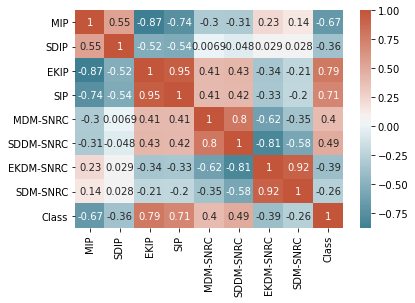

In [5]:
import matplotlib.pylab as plt
import seaborn as sns

corr = df_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
           cmap=sns.diverging_palette(220,20, as_cmap=True))

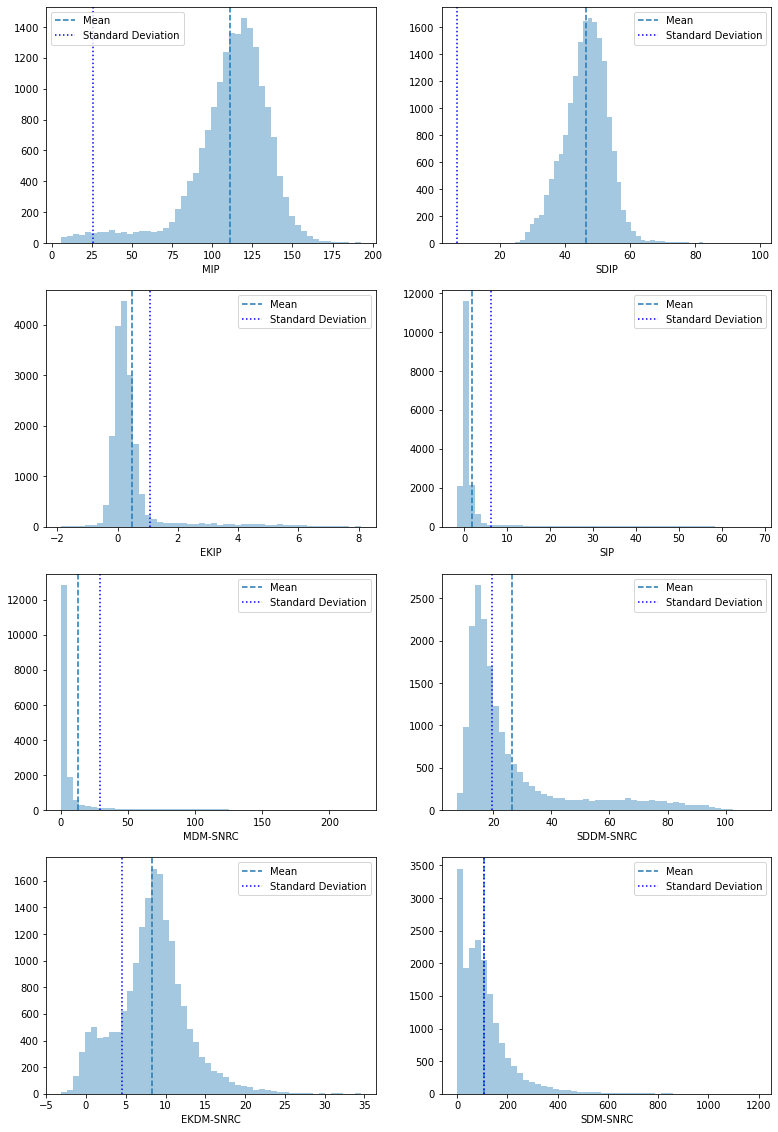

In [6]:
# Histograms to look at the distribution of data
plt.figure(figsize=(13, 20))
for i, col in enumerate(x_data.columns):
    plt.subplot(4, 2, i + 1)
    sns.distplot(x_data[col], kde=False)
    plt.axvline(x_data[col].mean(), linestyle="dashed", label="Mean")
    plt.axvline(
        x_data[col].std(), color="b", linestyle="dotted", label="Standard Deviation"
    )
    plt.legend(loc="best")

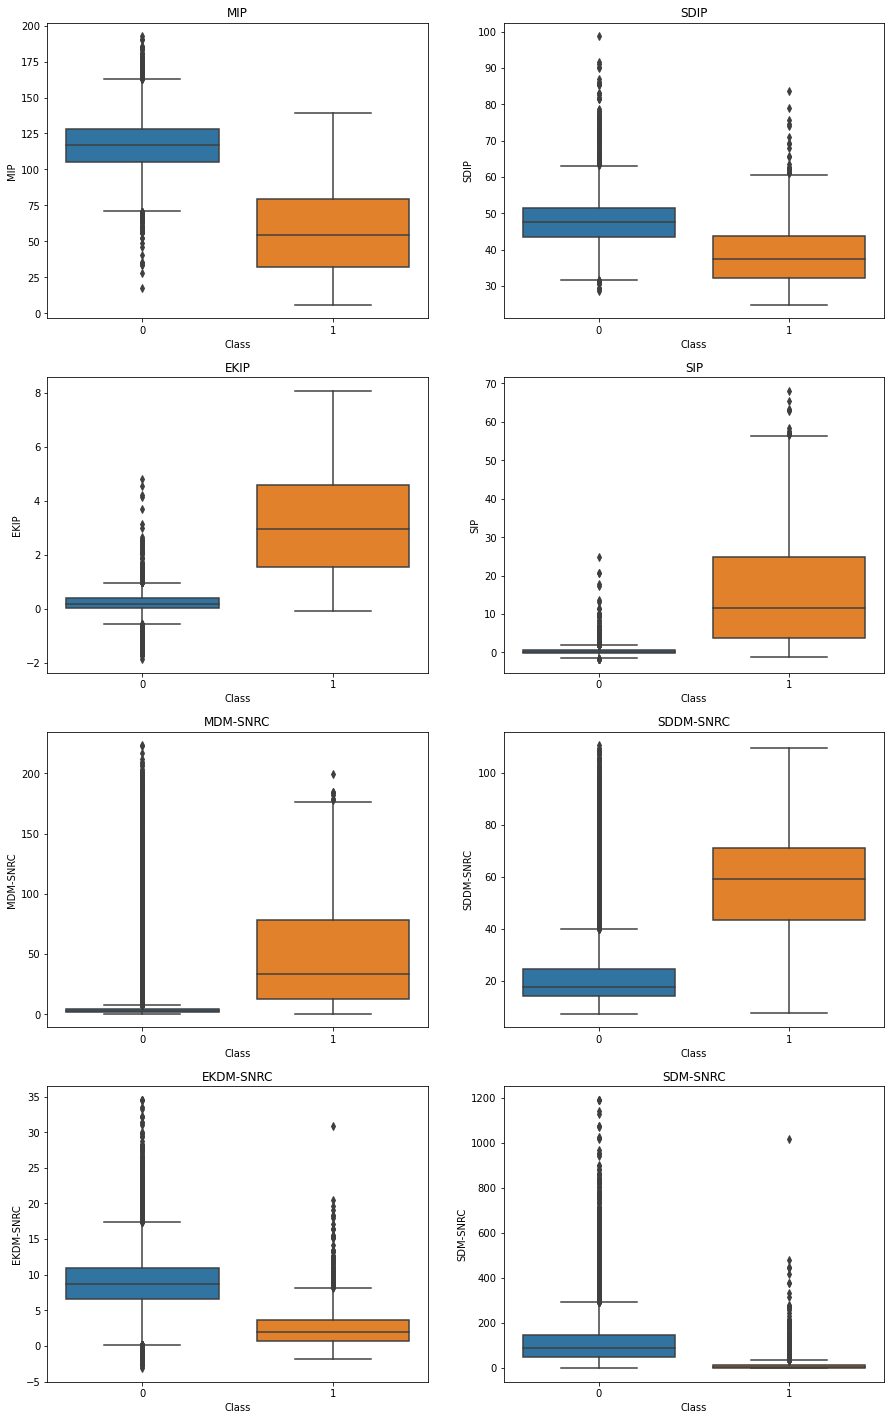

In [7]:
# Visual representation of the statistical summary of data
# Boxenplot shows a large number of quantiles
plt.figure(figsize=(15, 25))
for i, col in enumerate(x_data.columns):
    plt.subplot(4, 2, i + 1)
    plt.savefig(col + ".png")
    sns.boxplot(x=y_data, y=x_data[col])
    plt.title(col)

1.0


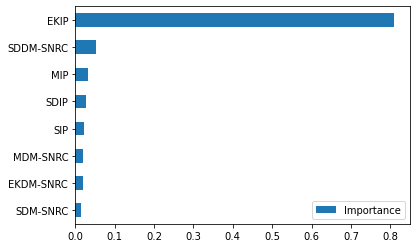

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
plot_variable_importance(x_data,df_data['Class'])

# SPLITTING DATASET INTO TRAIN & TEST DATASET

In [9]:
#WE SPLIT THE DATASET INTO A TRAIN DATASET AND TEST DATA SET
from sklearn.model_selection import train_test_split
x_orig_train,x_unknown_test,y_orig_train,y_unknown_test=train_test_split(df_data.drop(['Class'],axis=1),
                                              df_data['Class'],test_size=0.3,
                                               random_state=0)
print(x_orig_train.shape)
print(x_unknown_test.shape)

(12527, 8)
(5370, 8)


In [10]:
#KNOWN DATA
x_train,x_test,y_train,y_test=train_test_split(x_orig_train,
                                              y_orig_train,test_size=0.3,
                                               random_state=0)
print(x_train)
print(x_test)

              MIP       SDIP      EKIP        SIP   MDM-SNRC  SDDM-SNRC  \
7026   112.773438  45.492653  0.378458   0.693491   4.621237  25.510530   
15976   99.375000  48.652306  0.483554   0.183850   2.016722  16.419808   
10216   76.500000  33.869464  0.914434   4.845041   2.184783  13.811020   
2254   104.828125  45.194045  0.339591   0.126643   4.507525  25.484485   
82     112.125000  46.308409  0.721646   0.612454   1.173077  11.049190   
...           ...        ...       ...        ...        ...        ...   
11624  142.679688  47.400543 -0.221563  -0.035217   1.273411  11.163785   
4208    44.484375  43.758389  3.542064  12.752640  85.081940  51.938203   
9878   123.679688  54.935180  0.241887  -0.470349  21.705686  59.021412   
12933  107.703125  50.025831  0.488203   0.304953   2.263378  13.154473   
1254   118.515625  49.283298  0.096455  -0.227668   4.931438  25.665790   

       EKDM-SNRC    SDM-SNRC  
7026    6.098662   39.751485  
15976  10.301833  122.675027  
10216 

# FEATURE ENGINEERING

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)
x_unknown_test_std=sc.transform(x_unknown_test)

# MODEL SELECTION

In [12]:
##DummyClassifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(x_train,y_train)
y_pred = clf.predict(x_test)

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    3422
1     337
Name: Class, dtype: int64
y predicted : 
0    3759
dtype: int64


In [13]:
# DummyClassifier Evaluation metrics 
from sklearn.metrics import classification_report
cpr=classification_report(y_pred,y_test)
print(cpr)

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3759
           1       0.00      0.00      0.00         0

    accuracy                           0.91      3759
   macro avg       0.50      0.46      0.48      3759
weighted avg       1.00      0.91      0.95      3759

Confusion Matrix : 
[[3422    0]
 [ 337    0]]


C:\Users\Datebayo\ana\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
rfr=RandomForestClassifier(random_state=1)
rfr.fit(x_train_std,y_train)
y_pred = rfr.predict(x_test)

#A glance at the performance (different metrics)
acc=accuracy_score(y_test,y_pred)
print("Test accuracy=",acc)
recall = recall_score(y_test, y_pred)
print(recall)
prec = precision_score(y_test, y_pred)
print(prec)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)
f1 = f1_score(y_test, y_pred)
print(f1)

Test accuracy= 0.8994413407821229
0.7507418397626113
0.4625228519195612
0.8324135849894296
0.5723981900452488


[0.15181038 0.04356219 0.35454796 0.22625115 0.07832471 0.07011467
 0.03222896 0.04315999]


<BarContainer object of 8 artists>

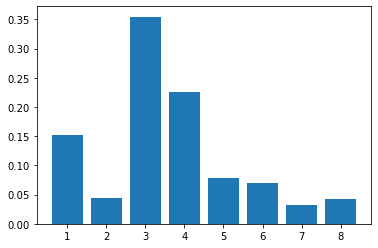

In [30]:
print(rfr.feature_importances_)
plt.bar(range(1,9),rfr.feature_importances_)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lr_model=LogisticRegression(C=1)
svc_model=SVC(gamma=0.001,C=1,kernel='linear') #'rbf'
knn_model=KNeighborsClassifier(n_neighbors=5)
dt_model=DecisionTreeClassifier(max_depth=3)
rfc_model=RandomForestClassifier(n_estimators=100,max_depth=5)
clf=[lr_model,svc_model,dt_model,rfc_model]


for i in clf:
    print("--------------------------------------")
    print(i)
    i.fit(x_train_std,y_train)
    pred=i.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print("Test accuracy=",acc)
    recall = recall_score(y_test, pred)
    print("Recall=",recall)
    prec = precision_score(y_test, pred)
    print("Precision =",prec)
    roc_auc = roc_auc_score(y_test, pred)
    print("Roc_auc=",roc_auc)
    f1 = f1_score(y_test, pred)
    print("f1_score",f1) 
    

--------------------------------------
LogisticRegression(C=1)
Test accuracy= 0.6153232242617718
Recall= 0.56973293768546
Precision = 0.12860013395847286
Roc_auc= 0.594772956276979
f1_score 0.20983606557377044
--------------------------------------
SVC(C=1, gamma=0.001, kernel='linear')
Test accuracy= 0.18116520351157223
Recall= 0.771513353115727
Precision = 0.07973014412756824
Roc_auc= 0.4472704112159582
f1_score 0.1445247359644247
--------------------------------------
DecisionTreeClassifier(max_depth=3)
Test accuracy= 0.7821229050279329
Recall= 0.9584569732937686
Precision = 0.28634751773049644
Roc_auc= 0.861607212538176
f1_score 0.4409556313993174
--------------------------------------
RandomForestClassifier(max_depth=5)
Test accuracy= 0.9207235967012504
Recall= 0.8724035608308606
Precision = 0.5355191256830601
Roc_auc= 0.8989428674990072
f1_score 0.6636568848758465


In [35]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
lr_model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [36]:
#OVERSAMPLING
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
xo_sampled, yo_sampled = ros.fit_resample(x_train_std, y_train)

#SAMPLES
from collections import Counter
print("Number of Samples after oversampling",sorted(Counter(yo_sampled).items()))

#LOGISTIC REGRESSION IMPLEMENTATION & CROSS VALIDATION WITH SAMPLED DATA

par = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
gs=GridSearchCV(estimator=lr_model,param_grid=par,cv=5,scoring='accuracy')
gs.fit(xo_sampled,yo_sampled)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

Number of Samples after oversampling [(0, 7932), (1, 7932)]
0.9409985299196523
{'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear')


In [28]:
#SVC IMPLEMENTATION & CROSS VALIDATION WITH SAMPLED DATA
par={'C':[0.001,0.01,0.1,1,10,100],
     'kernel':['linear','rbf']}
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=svc_model,param_grid=par,cv=5,scoring='accuracy')
gs.fit(xo_sampled,yo_sampled)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.9425116118065853
{'C': 100, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [41]:
# DECISION TREE CLASSIFIER IMPLEMENTATION & CROSS VALIDATION WITH SAMPLED DATA
par={'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12]
    }
    
gs=GridSearchCV(estimator=dt_model,param_grid=par,cv=5,scoring='accuracy')
gs.fit(xo_sampled,yo_sampled)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.984493315088811
{'criterion': 'gini', 'max_depth': 12}
DecisionTreeClassifier(max_depth=12)


In [52]:
#RANDOM FOREST CLASSIFIER IMPLEMENTATION & CROSS VALIDATION WITH SAMPLED DATA
par={'bootstrap': [True, False],
 'max_depth': [2,4,8,16],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [2,4,8,16,32,64,100,200]}

gs=GridSearchCV(estimator=rfc_model,param_grid=par,cv=5,scoring='accuracy')
gs.fit(xo_sampled,yo_sampled)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.9964070266581724
{'bootstrap': False, 'max_depth': 16, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier(bootstrap=False, max_depth=16, min_samples_split=5)


In [65]:
#UNDERSAMPLING
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
xu_sampled, yu_sampled = cc.fit_resample(x_train_std,y_train)
#SAMPLES
print("Number of Samples after undersampling",sorted(Counter(yu_sampled).items()))



#LOGISTIC REGRESSION CLASSIFIER IMPLEMENTATION & CROSS VALIDATION WITH SAMPLED DATA
par = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
gs=GridSearchCV(estimator=lr_model,param_grid=par,cv=5,scoring='accuracy')
gs.fit(xu_sampled,yu_sampled)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

Number of Samples after undersampling [(0, 836), (1, 836)]
0.9204575922781302
{'C': 29.763514416313132, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=29.763514416313132, penalty='l1', solver='liblinear')


In [66]:
#SVC CLASSIFIER IMPLEMENTATION & CROSS VALIDATION WITH SAMPLED DATA
par={'C':[0.001,0.01,0.1,1,10,100],
     'kernel':['linear','rbf']}
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=svc_model,param_grid=par,cv=5,scoring='accuracy')
gs.fit(xu_sampled,yu_sampled)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.9216587720082223
{'C': 1, 'kernel': 'linear'}
SVC(C=1, gamma=0.001, kernel='linear')


In [67]:
#DECISION TREE CLASSIFIER IMPLEMENTATION & CROSS VALIDATION WITH SAMPLED DATA
par={'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12]
    }
    
gs=GridSearchCV(estimator=dt_model,param_grid=par,cv=5,scoring='accuracy')
gs.fit(xu_sampled,yu_sampled)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.8995209580838324
{'criterion': 'entropy', 'max_depth': 6}
DecisionTreeClassifier(criterion='entropy', max_depth=6)


In [69]:
#RANDOM FOREST CLASSIFIER IMPLEMENTATION & CROSS VALIDATION WITH SAMPLED DATA
par={'bootstrap': [True, False],
 'max_depth': [2,4,8,16],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [2,4,8,16,32,64,100,200]}

gs=GridSearchCV(estimator=rfc_model,param_grid=par,cv=5,scoring='accuracy')
gs.fit(xu_sampled,yu_sampled)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.9198659397622665
{'bootstrap': True, 'max_depth': 16, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier(max_depth=16, min_samples_split=5)


Test accuracy= 0.8378026070763501
Recall= 0.9592274678111588
Precision = 0.3441108545034642
Roc_auc= 0.8927458709365744
f1_score 0.5065155807365439
[[4052   19]
 [ 852  447]]


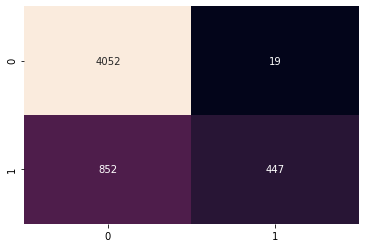

In [76]:
#FINAL MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


lr_model=LogisticRegression(C= 0.08858667904100823, penalty='l1', solver= 'liblinear')
svc_model=SVC(C=100, gamma=0.001)
dt_model=DecisionTreeClassifier(criterion='gini', max_depth= 12)
rfc_model=RandomForestClassifier(bootstrap= False, max_depth=16, max_features='auto', min_samples_split= 5, n_estimators= 100)
clf=[lr_model,svc_model,dt_model,rfc_model]
            
lr_model.fit(x_orig_train,y_orig_train)
pred=lr_model.predict(x_unknown_test_std)
acc=accuracy_score(y_unknown_test,pred)
print("Test accuracy=",acc)
recall = recall_score(y_unknown_test, pred)
print("Recall=",recall)
prec = precision_score(y_unknown_test, pred)
print("Precision =",prec)
roc_auc = roc_auc_score(y_unknown_test, pred)
print("Roc_auc=",roc_auc)
f1 = f1_score(y_unknown_test, pred)
print("f1_score",f1) 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,y_unknown_test)
import seaborn as sns
print(cm)
sns.heatmap(cm,annot=True,fmt='.0f',cbar=False)

Test accuracy= 0.913221601489758
Recall= 0.0
Precision = 0.0
Roc_auc= 0.5
f1_score 0.0
[[4904  466]
 [   0    0]]


C:\Users\Datebayo\ana\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


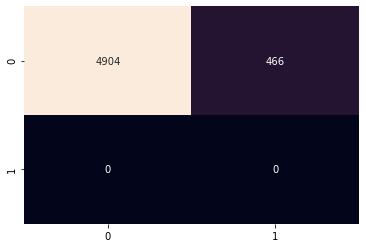

In [77]:
svc_model.fit(x_orig_train,y_orig_train)
pred=svc_model.predict(x_unknown_test_std)
acc=accuracy_score(y_unknown_test,pred)
print("Test accuracy=",acc)
recall = recall_score(y_unknown_test, pred)
print("Recall=",recall)
prec = precision_score(y_unknown_test, pred)
print("Precision =",prec)
roc_auc = roc_auc_score(y_unknown_test, pred)
print("Roc_auc=",roc_auc)
f1 = f1_score(y_unknown_test, pred)
print("f1_score",f1) 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,y_unknown_test)
import seaborn as sns
print(cm)
sns.heatmap(cm,annot=True,fmt='.0f',cbar=False)

Test accuracy= 0.9130353817504655
Recall= 0.055793991416309016
Precision = 0.49056603773584906
Roc_auc= 0.5251441408957565
f1_score 0.10019267822736032
[[4877  440]
 [  27   26]]


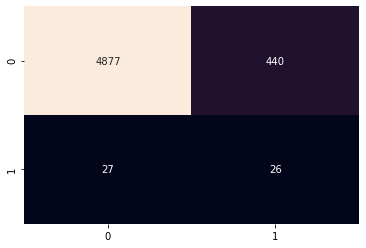

In [78]:
dt_model.fit(x_orig_train,y_orig_train)
pred=dt_model.predict(x_unknown_test_std)
acc=accuracy_score(y_unknown_test,pred)
print("Test accuracy=",acc)
recall = recall_score(y_unknown_test, pred)
print("Recall=",recall)
prec = precision_score(y_unknown_test, pred)
print("Precision =",prec)
roc_auc = roc_auc_score(y_unknown_test, pred)
print("Roc_auc=",roc_auc)
f1 = f1_score(y_unknown_test, pred)
print("f1_score",f1) 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,y_unknown_test)
import seaborn as sns
print(cm)
sns.heatmap(cm,annot=True,fmt='.0f',cbar=False)

Test accuracy= 0.9452513966480447
Recall= 0.37124463519313305
Precision = 0.9942528735632183
Roc_auc= 0.6855203600109222
f1_score 0.5406249999999999
[[4903  293]
 [   1  173]]


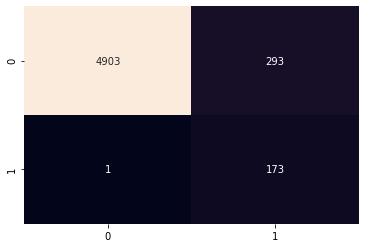

In [80]:
rfc_model.fit(x_orig_train,y_orig_train)
pred=rfc_model.predict(x_unknown_test_std)
acc=accuracy_score(y_unknown_test,pred)
print("Test accuracy=",acc)
recall = recall_score(y_unknown_test, pred)
print("Recall=",recall)
prec = precision_score(y_unknown_test, pred)
print("Precision =",prec)
roc_auc = roc_auc_score(y_unknown_test, pred)
print("Roc_auc=",roc_auc)
f1 = f1_score(y_unknown_test, pred)
print("f1_score",f1) 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,y_unknown_test)
import seaborn as sns
print(cm)
sns.heatmap(cm,annot=True,fmt='.0f',cbar=False)